In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C1.csv')
X, Y = df[['global_radiation']], df['temperature']


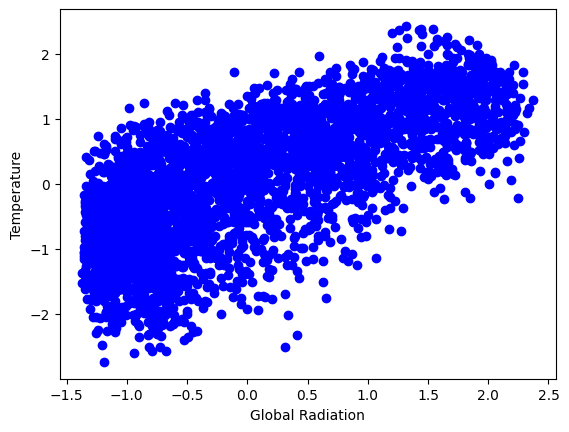

In [5]:
plt.scatter(X, Y, color='blue')
plt.xlabel('Global Radiation')
plt.ylabel('Temperature')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

/tmp/ipykernel_21987/1897250935.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--',  color='orange', lw=2)


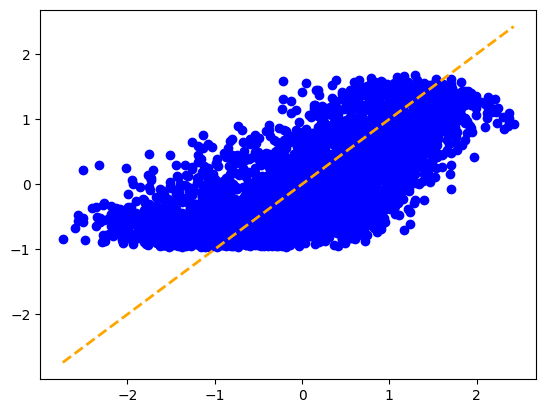

In [18]:
plt.scatter(Y, Y_pred, color='blue')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--',  color='orange', lw=2)
plt.show()


Dataset Loaded Successfully!
   global_radiation  temperature
0         -1.208678    -1.095641
1         -1.155215    -1.001222
2         -0.887898    -1.190060
3         -0.748894    -0.960756
4         -0.877206    -0.677498

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   global_radiation  3654 non-null   float64
 1   temperature       3654 non-null   float64
dtypes: float64(2)
memory usage: 57.2 KB
None


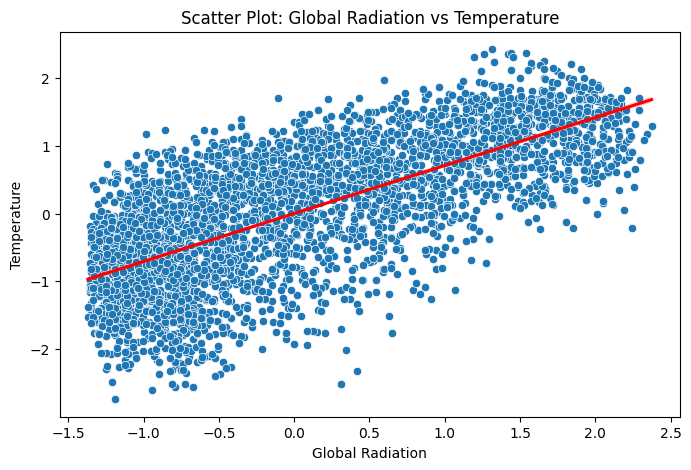


Regression Model Trained:
Slope      : 0.7084
Intercept  : -0.0000


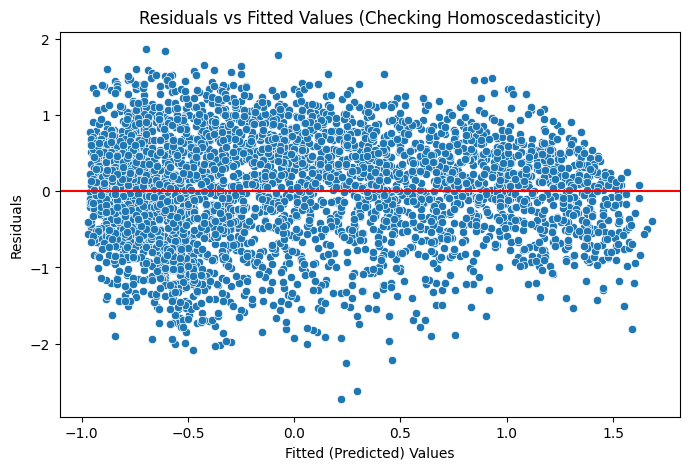

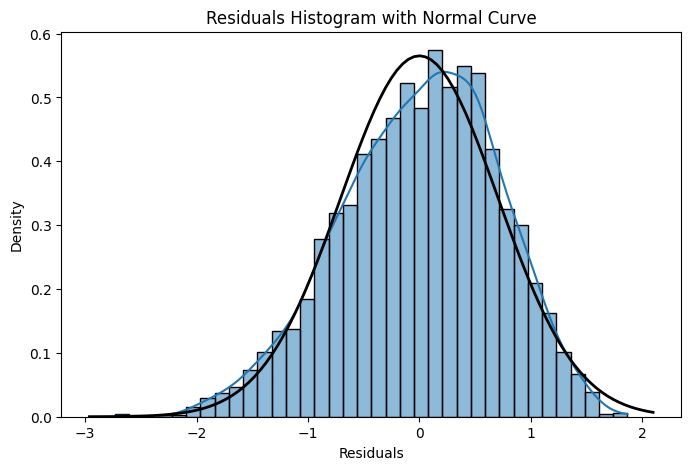

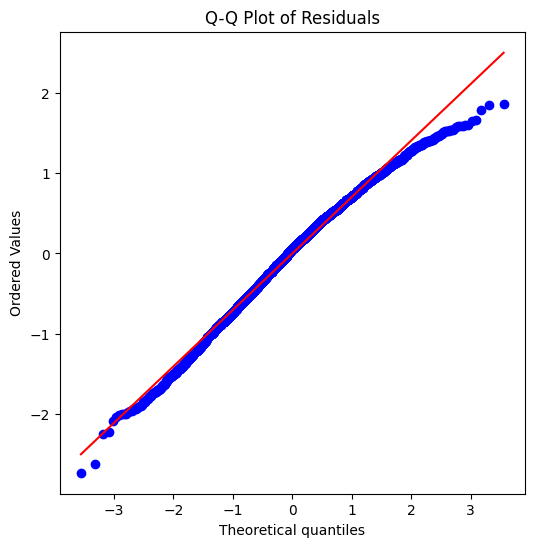

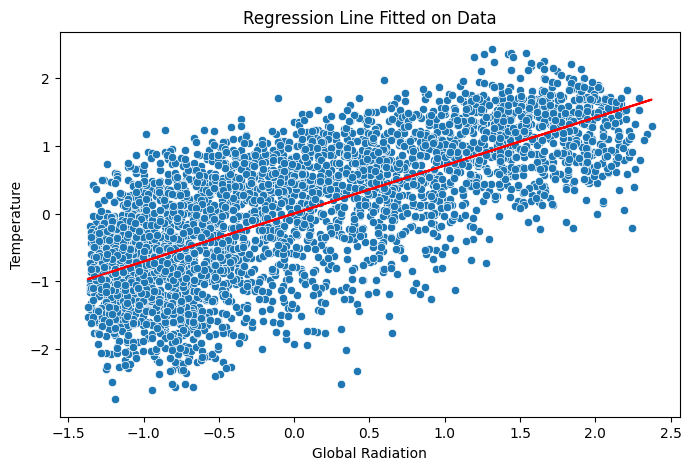


---------------- INTERPRETATION ----------------

1. The slope value (0.7084) tells us how much the temperature changes
   for every 1-unit increase in global radiation.

2. The scatter plot + regression line shows whether a linear pattern exists.

3. Residuals vs Fitted Plot:
   • If residuals are randomly scattered → good (homoscedastic).
   • If a pattern or funnel shape appears → heteroscedastic.

4. Histogram and Q-Q Plot:
   • If residuals follow a bell-curve and Q-Q points fall on the line → residuals are normal.
   • Deviations indicate non-normality.

5. Regression line plot shows how well the model fits overall.

-------------------------------------------------


In [19]:
# ------------------------------------------------------------
# EXPLORATORY DATA ANALYSIS & REGRESSION DIAGNOSTICS
# Predicting Temperature from Global Radiation
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('C1.csv')

print("\nDataset Loaded Successfully!")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Keep only needed columns
df = df[['global_radiation', 'temperature']].dropna()

# ------------------------------------------------------------
# 2. SCATTER PLOT + LINE OF BEST FIT
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='global_radiation', y='temperature')
sns.regplot(data=df, x='global_radiation', y='temperature', scatter=False, color='red')
plt.title("Scatter Plot: Global Radiation vs Temperature")
plt.xlabel("Global Radiation")
plt.ylabel("Temperature")
plt.show()

# ------------------------------------------------------------
# 3. FIT LINEAR REGRESSION MODEL
# ------------------------------------------------------------
X = df[['global_radiation']]
y = df['temperature']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("\nRegression Model Trained:")
print(f"Slope      : {slope:.4f}")
print(f"Intercept  : {intercept:.4f}")

df['predicted'] = model.predict(X)
df['residuals'] = df['temperature'] - df['predicted']

# ------------------------------------------------------------
# 4. RESIDUALS vs FITTED VALUES (Homoscedasticity)
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['predicted'], y=df['residuals'])
plt.axhline(0, color='red')
plt.title("Residuals vs Fitted Values (Checking Homoscedasticity)")
plt.xlabel("Fitted (Predicted) Values")
plt.ylabel("Residuals")
plt.show()

# ------------------------------------------------------------
# 5. NORMALITY OF RESIDUALS (Histogram + Normal Curve)
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['residuals'], kde=True, stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['residuals'].mean(), df['residuals'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title("Residuals Histogram with Normal Curve")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

# ------------------------------------------------------------
# 6. Q-Q PLOT FOR RESIDUALS NORMALITY
# ------------------------------------------------------------
plt.figure(figsize=(6,6))
probplot(df['residuals'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# ------------------------------------------------------------
# 7. SCATTER PLOT WITH FITTED REGRESSION LINE
# ------------------------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='global_radiation', y='temperature')
plt.plot(df['global_radiation'], df['predicted'], color='red')
plt.title("Regression Line Fitted on Data")
plt.xlabel("Global Radiation")
plt.ylabel("Temperature")
plt.show()

# ------------------------------------------------------------
# 8. INTERPRETATION
# ------------------------------------------------------------
print("\n---------------- INTERPRETATION ----------------")

print(f"\n1. The slope value ({slope:.4f}) tells us how much the temperature changes")
print("   for every 1-unit increase in global radiation.")

print("\n2. The scatter plot + regression line shows whether a linear pattern exists.")

print("\n3. Residuals vs Fitted Plot:")
print("   • If residuals are randomly scattered → good (homoscedastic).")
print("   • If a pattern or funnel shape appears → heteroscedastic.")

print("\n4. Histogram and Q-Q Plot:")
print("   • If residuals follow a bell-curve and Q-Q points fall on the line → residuals are normal.")
print("   • Deviations indicate non-normality.")

print("\n5. Regression line plot shows how well the model fits overall.")

print("\n-------------------------------------------------")
